--- Simple Pendulum Simulation (L=1.0m, g=9.81m/s^2, Damping=0.1) ---
Initial Angle: 60.00 degrees | Initial Velocity: 0.0 rad/s


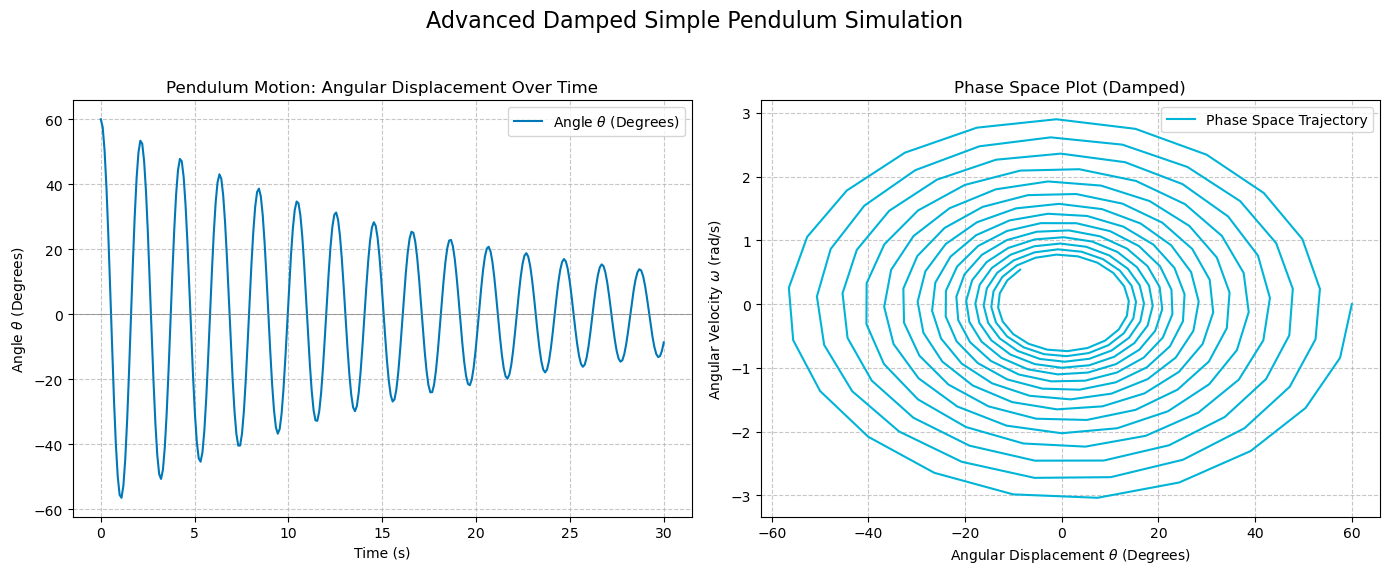

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- Configuration for the Pendulum ---
# These constants define the physical properties of the pendulum
G = 9.81      # Acceleration due to gravity (m/s^2)
L = 1.0       # Length of the pendulum rod (meters)
B = 0.1       # Damping coefficient (e.g., air resistance)

# --- Differential Equation Model ---

def pendulum_model(state, t, b, g, l):
    """
    Defines the system of first-order ordinary differential equations (ODEs) 
    for a damped, simple pendulum.

    The state vector is y = [theta, omega] where:
    - theta (y[0]): Angular displacement from the vertical (radians)
    - omega (y[1]): Angular velocity (radians/s)

    The differential equations are:
    1. d(theta)/dt = omega
    2. d(omega)/dt = (-g/l) * sin(theta) - (b/l) * omega
    """
    theta = state[0]
    omega = state[1]
    
    # Angular acceleration: d(omega)/dt
    d_omega_dt = (-g / l) * np.sin(theta) - (b / l) * omega
    
    # Angular velocity: d(theta)/dt
    d_theta_dt = omega
    
    return [d_theta_dt, d_omega_dt]

# --- Simulation Parameters and Execution ---

def run_simulation():
    """
    Sets up the initial conditions, solves the ODEs, and plots the results.
    """
    # Time points (0 to 30 seconds, 300 steps)
    T_START = 0
    T_END = 30
    NUM_POINTS = 300
    t = np.linspace(T_START, T_END, NUM_POINTS)

    # Initial conditions (y0 = [theta_0, omega_0])
    # Starting at 60 degrees (converted to radians) with zero initial velocity
    theta_0 = np.deg2rad(60.0) 
    omega_0 = 0.0
    y0 = [theta_0, omega_0]

    print(f"--- Simple Pendulum Simulation (L={L}m, g={G}m/s^2, Damping={B}) ---")
    print(f"Initial Angle: {np.rad2deg(theta_0):.2f} degrees | Initial Velocity: {omega_0} rad/s")

    # Solve the ODEs using scipy's odeint (Runge-Kutta solver)
    # The 'args' tuple passes the constants (B, G, L) to the pendulum_model function
    solution = odeint(pendulum_model, y0, t, args=(B, G, L))

    # Extract results
    theta = solution[:, 0]  # Angular displacement
    omega = solution[:, 1]  # Angular velocity

    # --- Plotting Results ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Angular Displacement vs. Time
    axes[0].plot(t, np.rad2deg(theta), label='Angle $\\theta$ (Degrees)', color='#0077b6')
    axes[0].set_title('Pendulum Motion: Angular Displacement Over Time')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Angle $\\theta$ (Degrees)')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend()
    axes[0].axhline(0, color='gray', linewidth=0.5)

    # 2. Phase Space Plot (Velocity vs. Displacement)
    # This shows the system's trajectory in a 2D plane (a classic physics visualization)
    axes[1].plot(np.rad2deg(theta), omega, label='Phase Space Trajectory', color='#00b4d8')
    axes[1].set_title('Phase Space Plot (Damped)')
    axes[1].set_xlabel('Angular Displacement $\\theta$ (Degrees)')
    axes[1].set_ylabel('Angular Velocity $\\omega$ (rad/s)')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].legend()

    # Add a visual representation of the pendulum's decay
    fig.suptitle('Advanced Damped Simple Pendulum Simulation', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    # Ensure necessary libraries are available
    try:
        run_simulation()
    except ImportError:
        print("Error: Required libraries (numpy, scipy, matplotlib) are not installed.")
        print("Please install them using: pip install numpy scipy matplotlib")
